# 介紹
1. 2020/6/7 測試可正常爬資料，

如果遇到無法爬資料可能是104、1111有改版導致BeautifulSoup無法找到calss、tag、attr，

**發生無法爬取從以下修改def**
* 104人力銀行
    * find_title_104 爬資料
    * selenium_get_Code_104 取得最大頁面數
* 1111人力銀行
    * find_title_1111 爬資料
    * find_data_1111 指定class、tag、id 並丟給find_title_1111
    * selenium_get_Code_1111 取得最大頁面數
    

2. 只爬取104，1111因為比較多人使用。
3. 爬取大量資料並使用Pandas處理資料及過濾資料，找有興趣的相關工作。 


104爬取資料有『日期、工作名稱、公司名稱、公司地址、薪資、工作內容、地區、經歷、學歷、公司人數、文章編號、工作網址』
11111爬取資料有『日期、工作名稱、公司名稱、公司地址、薪資、工作內容、地區、經歷、學歷、工作網址』

爬取資料並儲存csv格式，使用Pandas處理資料。


## 需安裝的套件
google colab 基本上已經安裝好許多套件
需要安裝的套件：
BeautifulSoup、requests、selenium、pandas、tqdm、openpyxl

## 使用selenium目的
104需要讓網頁加載javascript得到共有多少頁面，使用Headless(無頭)模式在背景執行Chrome，並不會實際看到瀏覽器。


In [1]:
#安裝selenium、chromium-chromedriver驅動及更新
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

import requests
from bs4 import BeautifulSoup
import re
import random
import time
from urllib.parse import quote
from tqdm import tqdm, trange
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import pandas as pd
from datetime import date
from IPython.display import clear_output
import os,os.path

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRe

In [0]:
!ls

# 104-1111人力銀行 爬蟲

In [0]:
def get_todate():
    return date.today()

def selenium_get_Code_104(url):
    #chrome_options = Options() # 啟動無頭模式
    chrome_options = webdriver.ChromeOptions() 
    chrome_options.add_argument('--headless') 
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver',options=chrome_options)
    driver.get(url)
    save = driver.page_source
    driver.quit()#關閉瀏覽器
    soup = BeautifulSoup(save, "html.parser")
    page = soup.select('.page-select.js-paging-select.gtm-paging-top')[0].find_all('option')[-1].get('value')
    return page

def read_url(url):
    USER_AGENT_LIST = [
        "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; AcooBrowser; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
        "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Acoo Browser; SLCC1; .NET CLR 2.0.50727; Media Center PC 5.0; .NET CLR 3.0.04506)",
        "Mozilla/4.0 (compatible; MSIE 7.0; AOL 9.5; AOLBuild 4337.35; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
        "Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)",
        "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 2.0.50727; Media Center PC 6.0)",
        "Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)",
        "Mozilla/4.0 (compatible; MSIE 7.0b; Windows NT 5.2; .NET CLR 1.1.4322; .NET CLR 2.0.50727; InfoPath.2; .NET CLR 3.0.04506.30)",
        "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN) AppleWebKit/523.15 (KHTML, like Gecko, Safari/419.3) Arora/0.3 (Change: 287 c9dfb30)",
        "Mozilla/5.0 (X11; U; Linux; en-US) AppleWebKit/527+ (KHTML, like Gecko, Safari/419.3) Arora/0.6",
        "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.8.1.2pre) Gecko/20070215 K-Ninja/2.1.1",
        "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; rv:1.9) Gecko/20080705 Firefox/3.0 Kapiko/3.0",
        "Mozilla/5.0 (X11; Linux i686; U;) Gecko/20070322 Kazehakase/0.4.5",
        "Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.8) Gecko Fedora/1.9.0.8-1.fc10 Kazehakase/0.5.6",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20",
        "Opera/9.80 (Macintosh; Intel Mac OS X 10.6.8; U; fr) Presto/2.9.168 Version/11.52",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.11 TaoBrowser/2.0 Safari/536.11",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER",
        "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; LBBROWSER)",
        "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E; LBBROWSER)",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 LBBROWSER",
        "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
        "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; QQBrowser/7.0.3698.400)",
        "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
        "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; SV1; QQDownload 732; .NET4.0C; .NET4.0E; 360SE)",
        "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
        "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
        "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
        "Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS X; zh-cn) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8C148 Safari/6533.18.5",
        "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:2.0b13pre) Gecko/20110307 Firefox/4.0b13pre",
        "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:16.0) Gecko/20100101 Firefox/16.0",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11",
        "Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10",
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
        ]
    USER_AGENT = random.choice(USER_AGENT_LIST)
    headers = {'user-agent': USER_AGENT}
    s = requests.Session()
    req = s.get(url, headers = headers)
    soup = BeautifulSoup(req.text, "html.parser")
    return soup

def csv_column_104(path_csv, key_txt): #建立行標題
    with open(path_csv + '.csv', mode='a+', newline='', encoding='utf-8') as employee_file: 
        employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        employee_writer.writerow(['日期', '工作名稱', '公司名稱', '公司地址', '薪資', '工作內容', '地區', '經歷', '學歷', '公司人數', '文章編號', '工作網址'])

def find_title_104(key_txt):
    #路徑組合
    today = get_todate()
    path_csv = "%s" % os.getcwd() + '/' + 'jobs_csv/'+ str(today) + key_txt + '_104人力銀行'
    if not os.path.isdir('jobs_csv'): # 確認是否有jobs_csv資料夾  沒有則返回Ture
        os.mkdir('jobs_csv') # 建立jobs_csv資料夾
        print('建立jobs_csv資料夾完成')
    csv_column_104(path_csv, key_txt) #建立行標題
    csv_save = ""
    key = quote(key_txt)
    #  104 api searchTempExclude=2  -> 設定排除派遣
    find_page_url = 'https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword={0}&order=15&asc=0&page=1&mode=s&jobsource=2018indexpoc&searchTempExclude=2'.format(key)
    get_sum_page = int(selenium_get_Code_104(find_page_url))
    print('共有：' + str(get_sum_page) + ' 頁')
    for i in tqdm(range(1, get_sum_page+1)):  #set page 1 to find all max page ,tqdm讀取進度條
        url = 'https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword={0}&order=15&asc=0&page={1}&mode=s&jobsource=2018indexpoc&searchTempExclude=2'.format(key, i) 
        #time.sleep(random.randint(2,10)) #隨機等待
        soup = read_url(url) #讀取網頁
        print('目前爬取頁面是：' + url)
        for title_1 in soup.select('.b-block__left'):
            #有三個資料是無資料的，遇到無資料就跳過這個迴圈
            if title_1.select('.b-list-inline.b-clearfix.job-list-item__company') != soup.select('.b-block__left')[0].select('.b-list-inline.b-clearfix.job-list-item__company'):
                #日期
                try:
                    #正常代表找到 讚 廣告 (業主買廣告)，發生異常代表找不到 讚，執行except找日期 
                    date_match__ = title_1.select('.b-icon--gray.b-icon--w18')[0].select('use')[0]
                    date = '廣告'
                except:
                    date = title_1.select('.b-tit__date')[0].get_text().replace('\n','').replace(' ','')
        
                #地區
                area = title_1.select('.b-list-inline.b-clearfix.job-list-intro.b-content')[0].find('li').get_text()
                #經歷(年資)
                experience = title_1.select('.b-list-inline.b-clearfix.job-list-intro.b-content')[0].find_all('li')[1].get_text()
                try: #業者沒有輸入學歷，遇到錯誤處理
                    #學歷
                    education = title_1.select('.b-list-inline.b-clearfix.job-list-intro.b-content')[0].find_all('li')[2].get_text()
                except:
                    education = ""
                #工作網址
                title_url = title_1.select('.js-job-link')[0].get('href')[2:]
                #get 文章編號
                title_str = title_url.split('?')[0].split('/')[-1] #get 文章編號
                #標題名稱
                title = title_1.select('.js-job-link')[0].get_text() #get title
                #print(title + title_url + area)
                #公司名
                company_name = title_1.select('li')[1].find('a').get('title').split('\n')[0][4:]
                try:
                    #公司地址
                    company_address = title_1.select('li')[1].find('a').get('title').split('\n')[1][5:]
                except:
                    company_address = ""
                try:
                    #簡介
                    introduction = title_1.select('.job-list-item__info.b-clearfix.b-content')[0].get_text()
                    #處理string \r \n5 \n轉成''
                    introduction = introduction.replace('\r','').replace('\n5','').replace('\n','')
                except:
                    introduction = ""
                #薪資
                try:
                    salary = title_1.select('.b-tag--default')[0].get_text()
                except:
                    salary = 0 #沒有寫薪資或待遇面議，設定 0
                    
                if salary == '待遇面議':
                    salary = "待遇面議"
                else: #數字處理 25000~35000 取25000最低薪資為主要，三位數 = 日薪，四位數 = 論件計酬
                    try:
                        salary = re.search('\d+.\d+', salary).group()
                    except:
                        salary = 0
                #員工人數
                try:
                    people = title_1.select('.b-tag--default')[1].get_text()
                except:
                    people = ""
                #clear_output() # 清除輸出 用於清除進度讀，註解#不使用：用來檢查出錯的網址

                with open(path_csv + '.csv', mode='a+', newline='', encoding='utf-8') as employee_file: #w
                    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    employee_writer.writerow([date, title, company_name, company_address, salary, introduction, area, experience, education, people, title_str, title_url])
            else:
                continue
    return print('爬取104完成：請開啟csv檔案')


# input_go = input('輸入關鍵字')
# save_title_data = find_title_104(input_go)




############ 1111人力銀行 #########


def selenium_get_Code_1111(url):
    chrome_options = webdriver.ChromeOptions() 
    chrome_options.add_argument('--headless') 
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver',options=chrome_options)
    driver.get(url)
    save = driver.page_source
    driver.quit()#關閉瀏覽器
    soup = BeautifulSoup(save, "html.parser")
    
    page = soup.select('.custom-select')[0].select('option')[0].text
    page = page.split('/')
    page = page[1].strip(' ')
    return page


def csv_column_1111(path_csv): #建立行標題
    with open(path_csv + '.csv', mode='a+', newline='', encoding='utf-8') as employee_file: 
        employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        employee_writer.writerow(['日期', '工作名稱', '公司名稱', '公司地址', '薪資', '工作內容', '地區', '經歷', '學歷', '工作網址'])

def find_data_1111(soup):
    #錢錢
    mnone = soup.select('.needs') 
    #縣市區域
    location = soup.select('.needs')
    #日期
    get_date = soup.select('.date')
    #簡介
    jbInfoTxt = soup.select('.jbInfoTxt')
    #網址
    jobs_url = soup.select('.position0')
    #公司名稱、類別、住址
    company_data = soup.select('.d-md-flex')
    #工作標題
    title = soup.select('.position0')
    #工作經驗
    jobs_exp = soup.select('.needs')
    # 學歷
    education = soup.select('.needs')
    return mnone, location, jbInfoTxt, jobs_url, company_data, title, jobs_exp, get_date, education


        
def find_title_1111(key_txt):
    #路徑組合
    today = get_todate()
    path_csv = 'jobs_csv/' + str(today) + key_txt + '_1111人力銀行'
    if not os.path.isdir('jobs_csv'): # 確認是否有jobs_csv資料夾  沒有則返回Ture
        os.mkdir('jobs_csv') # 建立jobs_csv資料夾
        print('建立jobs_csv資料夾完成')
    csv_column_1111(path_csv) #建立行標題
    key = quote(key_txt)
    find_page_url = 'https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks={0}&page=1'.format(key)
    #取得最大page數
    get_sum_page = int(selenium_get_Code_1111(find_page_url))
    print('共有：' + str(get_sum_page) + ' 頁')
    
    for i in tqdm(range(1, get_sum_page+1)):
        url = 'https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks={0}&page={1}'.format(key, i)
        soup = read_url(url) #讀取網頁
        #讀取網頁資料
        mnone, location, jbInfoTxt, jobs_url, company_data, title, jobs_exp, get_date, education = find_data_1111(soup)
        print('目前爬取頁面是：' + url)
        for mnone, location, jbInfoTxt, jobs_url, company_data, title, jobs_exp, get_date, education in zip(mnone, location, jbInfoTxt, jobs_url, company_data, title, jobs_exp, get_date, education):
            #錢 取最低薪資
            try:
                mnone = mnone.find_all("span")[1].get_text()
                get_mone = re.search('\d+.\d+', mnone).group()
            except:
                get_mone = '面議（經常性薪資4萬/月含以上）' #也可以直接給40000
            #日期
            get_date = get_date.get_text()[5:]

            #縣市區域
            location = location.find_all("span")[0].get_text()

            #簡介
            jbInfoTxt = jbInfoTxt.get_text().replace("\xa0", "") #刪除\xa0

            #工作網址
            jobs_url = 'https://www.1111.com.tw{0}'.format(jobs_url.find('a').get('href'))

            #公司名
            company = company_data.find_all('a')[0].get('title').replace('\r','').split('\n')[0][6:]

            #公司分類 目前暫不使用
            category = company_data.find_all('a')[0].get('title').replace('\r','').split('\n')[1][6:]

            #公司地址
            address = company_data.find_all('a')[0].get('title').replace('\r','').split('\n')[2][6:]

            #工作標題
            title = title.find('a').get('title')

            # 工作經驗
            jobs_exp = jobs_exp.find_all("span")[2].get_text()

            # 學歷
            education = education.find_all("span")[3].get_text()
            # 儲存

            # clear_output() # 清除輸出 用於清除進度讀

            with open(path_csv + '.csv', mode='a+', newline='', encoding='utf-8') as employee_file: #w
                employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                employee_writer.writerow([get_date, title, company, address, get_mone, jbInfoTxt, location, jobs_exp, education, jobs_url])
    return print('爬取1111完成：請開啟csv檔案')

# 執行爬蟲

可直接使用 find_title_104('金融') find_title_1111('金融')

或

執行下列判斷依照說明執行

In [4]:
sel = input('請選擇要使用104或是1111，兩種都要爬輸入 2：')

while True:
    if sel == '104':
        input_str = input('請輸入要搜尋的關鍵字，取消請輸入0：')
        if input_str == '0':
            print('已經取消')
            break
        find_title_104(input_str)
        break
    elif sel == '1111':
        input_str = input('請輸入要搜尋的關鍵字，取消請輸入0：')
        if input_str == '0':
            print('已經取消')
            break
        find_title_1111(input_str)
        break
    elif sel == '0':
        break
    elif sel == '2':
        input_str = input('請輸入要搜尋的關鍵字，取消請輸入0：')
        if input_str == '0':
            print('已經取消')
            break        
        print('爬取104、1111')
        find_title_104(input_str)
        find_title_1111(input_str)
        break

    else:
        print('請輸入正確的選項：輸入 104 或 1111：')
        sel = input('請選擇要使用104或是1111：')

請選擇要使用104或是1111，兩種都要爬輸入 2：2
請輸入要搜尋的關鍵字，取消請輸入0：金融
爬取104、1111
建立jobs_csv資料夾完成


  0%|          | 0/150 [00:00<?, ?it/s]

共有：150 頁


  1%|          | 1/150 [00:01<04:01,  1.62s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=1&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  1%|▏         | 2/150 [00:03<04:00,  1.63s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=2&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  2%|▏         | 3/150 [00:04<03:55,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=3&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  3%|▎         | 4/150 [00:06<03:53,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=4&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  3%|▎         | 5/150 [00:07<03:49,  1.58s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=5&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  4%|▍         | 6/150 [00:09<03:37,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=6&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  5%|▍         | 7/150 [00:10<03:30,  1.47s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=7&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  5%|▌         | 8/150 [00:12<03:35,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=8&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  6%|▌         | 9/150 [00:13<03:36,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=9&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  7%|▋         | 10/150 [00:15<03:39,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=10&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  7%|▋         | 11/150 [00:16<03:28,  1.50s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=11&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  8%|▊         | 12/150 [00:18<03:29,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=12&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  9%|▊         | 13/150 [00:20<03:32,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=13&mode=s&jobsource=2018indexpoc&searchTempExclude=2


  9%|▉         | 14/150 [00:21<03:25,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=14&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 10%|█         | 15/150 [00:22<03:19,  1.48s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=15&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 11%|█         | 16/150 [00:24<03:14,  1.45s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=16&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 11%|█▏        | 17/150 [00:25<03:18,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=17&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 12%|█▏        | 18/150 [00:27<03:12,  1.46s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=18&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 13%|█▎        | 19/150 [00:28<03:14,  1.48s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=19&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 13%|█▎        | 20/150 [00:30<03:16,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=20&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 14%|█▍        | 21/150 [00:31<03:08,  1.46s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=21&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 15%|█▍        | 22/150 [00:33<03:03,  1.43s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=22&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 15%|█▌        | 23/150 [00:34<03:04,  1.46s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=23&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 16%|█▌        | 24/150 [00:37<03:52,  1.85s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=24&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 17%|█▋        | 25/150 [00:38<03:41,  1.77s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=25&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 17%|█▋        | 26/150 [00:40<03:36,  1.75s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=26&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 18%|█▊        | 27/150 [00:41<03:19,  1.62s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=27&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 19%|█▊        | 28/150 [00:43<03:10,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=28&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 19%|█▉        | 29/150 [00:44<03:02,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=29&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 20%|██        | 30/150 [00:46<03:01,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=30&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 21%|██        | 31/150 [00:47<03:00,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=31&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 21%|██▏       | 32/150 [00:49<03:02,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=32&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 22%|██▏       | 33/150 [00:51<03:07,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=33&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 23%|██▎       | 34/150 [00:52<03:03,  1.58s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=34&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 23%|██▎       | 35/150 [00:54<02:56,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=35&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 24%|██▍       | 36/150 [00:55<02:58,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=36&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 25%|██▍       | 37/150 [00:57<02:56,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=37&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 25%|██▌       | 38/150 [00:58<02:49,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=38&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 26%|██▌       | 39/150 [01:00<02:43,  1.47s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=39&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 27%|██▋       | 40/150 [01:01<02:52,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=40&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 27%|██▋       | 41/150 [01:03<02:54,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=41&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 28%|██▊       | 42/150 [01:05<02:53,  1.61s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=42&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 29%|██▊       | 43/150 [01:06<02:50,  1.59s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=43&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 29%|██▉       | 44/150 [01:08<02:48,  1.59s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=44&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 30%|███       | 45/150 [01:09<02:41,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=45&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 31%|███       | 46/150 [01:11<02:33,  1.48s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=46&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 31%|███▏      | 47/150 [01:12<02:28,  1.45s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=47&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 32%|███▏      | 48/150 [01:13<02:25,  1.43s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=48&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 33%|███▎      | 49/150 [01:15<02:29,  1.48s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=49&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 33%|███▎      | 50/150 [01:17<02:31,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=50&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 34%|███▍      | 51/150 [01:18<02:27,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=51&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 35%|███▍      | 52/150 [01:20<02:30,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=52&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 35%|███▌      | 53/150 [01:21<02:26,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=53&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 36%|███▌      | 54/150 [01:23<02:25,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=54&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 37%|███▋      | 55/150 [01:24<02:25,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=55&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 37%|███▋      | 56/150 [01:26<02:25,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=56&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 38%|███▊      | 57/150 [01:27<02:25,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=57&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 39%|███▊      | 58/150 [01:29<02:19,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=58&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 39%|███▉      | 59/150 [01:30<02:16,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=59&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 40%|████      | 60/150 [01:32<02:13,  1.48s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=60&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 41%|████      | 61/150 [01:33<02:15,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=61&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 41%|████▏     | 62/150 [01:35<02:20,  1.59s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=62&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 42%|████▏     | 63/150 [01:37<02:21,  1.63s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=63&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 43%|████▎     | 64/150 [01:38<02:23,  1.66s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=64&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 43%|████▎     | 65/150 [01:40<02:20,  1.65s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=65&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 44%|████▍     | 66/150 [01:41<02:11,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=66&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 45%|████▍     | 67/150 [01:43<02:09,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=67&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 45%|████▌     | 68/150 [01:44<02:05,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=68&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 46%|████▌     | 69/150 [01:46<02:03,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=69&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 47%|████▋     | 70/150 [01:48<02:03,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=70&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 47%|████▋     | 71/150 [01:49<02:06,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=71&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 48%|████▊     | 72/150 [01:51<01:58,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=72&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 49%|████▊     | 73/150 [01:52<01:59,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=73&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 49%|████▉     | 74/150 [01:54<01:57,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=74&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 50%|█████     | 75/150 [01:55<01:57,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=75&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 51%|█████     | 76/150 [01:57<01:50,  1.50s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=76&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 51%|█████▏    | 77/150 [01:58<01:50,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=77&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 52%|█████▏    | 78/150 [02:00<01:49,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=78&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 53%|█████▎    | 79/150 [02:02<01:52,  1.58s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=79&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 53%|█████▎    | 80/150 [02:03<01:51,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=80&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 54%|█████▍    | 81/150 [02:05<01:50,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=81&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 55%|█████▍    | 82/150 [02:08<02:11,  1.94s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=82&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 55%|█████▌    | 83/150 [02:09<01:59,  1.79s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=83&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 56%|█████▌    | 84/150 [02:10<01:53,  1.71s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=84&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 57%|█████▋    | 85/150 [02:12<01:45,  1.63s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=85&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 57%|█████▋    | 86/150 [02:13<01:39,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=86&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 58%|█████▊    | 87/150 [02:15<01:37,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=87&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 59%|█████▊    | 88/150 [02:17<01:40,  1.62s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=88&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 59%|█████▉    | 89/150 [02:18<01:37,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=89&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 60%|██████    | 90/150 [02:20<01:34,  1.58s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=90&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 61%|██████    | 91/150 [02:21<01:31,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=91&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 61%|██████▏   | 92/150 [02:23<01:26,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=92&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 62%|██████▏   | 93/150 [02:24<01:22,  1.45s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=93&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 63%|██████▎   | 94/150 [02:26<01:25,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=94&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 63%|██████▎   | 95/150 [02:27<01:26,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=95&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 64%|██████▍   | 96/150 [02:29<01:21,  1.51s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=96&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 65%|██████▍   | 97/150 [02:30<01:23,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=97&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 65%|██████▌   | 98/150 [02:32<01:21,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=98&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 66%|██████▌   | 99/150 [02:33<01:16,  1.50s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=99&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 67%|██████▋   | 100/150 [02:35<01:16,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=100&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 67%|██████▋   | 101/150 [02:36<01:15,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=101&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 68%|██████▊   | 102/150 [02:38<01:11,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=102&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 69%|██████▊   | 103/150 [02:39<01:08,  1.45s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=103&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 69%|██████▉   | 104/150 [02:41<01:07,  1.47s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=104&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 70%|███████   | 105/150 [02:42<01:07,  1.50s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=105&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 71%|███████   | 106/150 [02:44<01:07,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=106&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 71%|███████▏  | 107/150 [02:45<01:04,  1.50s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=107&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 72%|███████▏  | 108/150 [02:47<01:02,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=108&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 73%|███████▎  | 109/150 [02:48<01:01,  1.50s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=109&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 73%|███████▎  | 110/150 [02:50<00:58,  1.47s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=110&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 74%|███████▍  | 111/150 [02:51<00:59,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=111&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 75%|███████▍  | 112/150 [02:53<00:58,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=112&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 75%|███████▌  | 113/150 [02:54<00:56,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=113&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 76%|███████▌  | 114/150 [02:56<00:55,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=114&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 77%|███████▋  | 115/150 [02:58<00:55,  1.58s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=115&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 77%|███████▋  | 116/150 [02:59<00:53,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=116&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 78%|███████▊  | 117/150 [03:01<00:51,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=117&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 79%|███████▊  | 118/150 [03:02<00:49,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=118&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 79%|███████▉  | 119/150 [03:04<00:47,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=119&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 80%|████████  | 120/150 [03:05<00:43,  1.46s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=120&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 81%|████████  | 121/150 [03:07<00:43,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=121&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 81%|████████▏ | 122/150 [03:08<00:43,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=122&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 82%|████████▏ | 123/150 [03:10<00:42,  1.59s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=123&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 83%|████████▎ | 124/150 [03:12<00:43,  1.68s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=124&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 83%|████████▎ | 125/150 [03:13<00:39,  1.59s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=125&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 84%|████████▍ | 126/150 [03:15<00:38,  1.62s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=126&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 85%|████████▍ | 127/150 [03:17<00:37,  1.62s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=127&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 85%|████████▌ | 128/150 [03:18<00:34,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=128&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 86%|████████▌ | 129/150 [03:19<00:32,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=129&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 87%|████████▋ | 130/150 [03:21<00:30,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=130&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 87%|████████▋ | 131/150 [03:22<00:28,  1.48s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=131&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 88%|████████▊ | 132/150 [03:24<00:27,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=132&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 89%|████████▊ | 133/150 [03:25<00:26,  1.53s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=133&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 89%|████████▉ | 134/150 [03:27<00:24,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=134&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 90%|█████████ | 135/150 [03:29<00:23,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=135&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 91%|█████████ | 136/150 [03:30<00:21,  1.52s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=136&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 91%|█████████▏| 137/150 [03:32<00:20,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=137&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 92%|█████████▏| 138/150 [03:33<00:17,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=138&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 93%|█████████▎| 139/150 [03:35<00:16,  1.49s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=139&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 93%|█████████▎| 140/150 [03:36<00:15,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=140&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 94%|█████████▍| 141/150 [03:38<00:14,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=141&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 95%|█████████▍| 142/150 [03:40<00:12,  1.60s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=142&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 95%|█████████▌| 143/150 [03:41<00:11,  1.58s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=143&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 96%|█████████▌| 144/150 [03:43<00:09,  1.56s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=144&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 97%|█████████▋| 145/150 [03:44<00:07,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=145&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 97%|█████████▋| 146/150 [03:46<00:06,  1.62s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=146&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 98%|█████████▊| 147/150 [03:48<00:04,  1.63s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=147&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 99%|█████████▊| 148/150 [03:49<00:03,  1.54s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=148&mode=s&jobsource=2018indexpoc&searchTempExclude=2


 99%|█████████▉| 149/150 [03:51<00:01,  1.57s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=149&mode=s&jobsource=2018indexpoc&searchTempExclude=2


100%|██████████| 150/150 [03:52<00:00,  1.55s/it]

目前爬取頁面是：https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D&order=15&asc=0&page=150&mode=s&jobsource=2018indexpoc&searchTempExclude=2
爬取104完成：請開啟csv檔案



  0%|          | 0/150 [00:00<?, ?it/s]

共有：150 頁


  1%|          | 1/150 [00:02<06:55,  2.79s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=1


  1%|▏         | 2/150 [00:03<05:42,  2.31s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=2


  2%|▏         | 3/150 [00:06<05:36,  2.29s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=3


  3%|▎         | 4/150 [00:08<05:36,  2.31s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=4


  3%|▎         | 5/150 [00:10<05:21,  2.22s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=5


  4%|▍         | 6/150 [00:13<05:48,  2.42s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=6


  5%|▍         | 7/150 [00:14<04:44,  1.99s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=7


  5%|▌         | 8/150 [00:16<04:45,  2.01s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=8


  6%|▌         | 9/150 [00:17<04:09,  1.77s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=9


  7%|▋         | 10/150 [00:20<04:29,  1.92s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=10


  7%|▋         | 11/150 [00:21<03:57,  1.71s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=11


  8%|▊         | 12/150 [00:23<04:19,  1.88s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=12


  9%|▊         | 13/150 [00:24<03:56,  1.73s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=13


  9%|▉         | 14/150 [00:25<03:24,  1.51s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=14


 10%|█         | 15/150 [00:27<03:43,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=15


 11%|█         | 16/150 [00:29<03:58,  1.78s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=16


 11%|█▏        | 17/150 [00:31<04:07,  1.86s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=17


 12%|█▏        | 18/150 [00:32<03:30,  1.60s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=18


 13%|█▎        | 19/150 [00:33<03:05,  1.41s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=19


 13%|█▎        | 20/150 [00:34<02:46,  1.28s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=20


 14%|█▍        | 21/150 [00:37<03:28,  1.62s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=21


 15%|█▍        | 22/150 [00:38<03:02,  1.43s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=22


 15%|█▌        | 23/150 [00:41<03:51,  1.82s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=23


 16%|█▌        | 24/150 [00:42<03:17,  1.57s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=24


 17%|█▋        | 25/150 [00:44<03:32,  1.70s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=25


 17%|█▋        | 26/150 [00:46<03:48,  1.85s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=26


 18%|█▊        | 27/150 [00:48<03:52,  1.89s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=27


 19%|█▊        | 28/150 [00:50<03:56,  1.94s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=28


 19%|█▉        | 29/150 [00:52<04:01,  2.00s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=29


 20%|██        | 30/150 [00:54<04:00,  2.00s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=30


 21%|██        | 31/150 [00:56<04:17,  2.16s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=31


 21%|██▏       | 32/150 [00:57<03:33,  1.81s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=32


 22%|██▏       | 33/150 [00:59<03:39,  1.87s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=33


 23%|██▎       | 34/150 [01:02<03:44,  1.94s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=34


 23%|██▎       | 35/150 [01:04<03:47,  1.98s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=35


 24%|██▍       | 36/150 [01:06<03:48,  2.00s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=36


 25%|██▍       | 37/150 [01:08<03:47,  2.01s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=37


 25%|██▌       | 38/150 [01:10<03:46,  2.02s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=38


 26%|██▌       | 39/150 [01:12<03:45,  2.03s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=39


 27%|██▋       | 40/150 [01:13<03:09,  1.72s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=40


 27%|██▋       | 41/150 [01:15<03:29,  1.92s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=41


 28%|██▊       | 42/150 [01:17<03:32,  1.96s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=42


 29%|██▊       | 43/150 [01:18<02:58,  1.67s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=43


 29%|██▉       | 44/150 [01:19<02:35,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=44


 30%|███       | 45/150 [01:20<02:18,  1.32s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=45


 31%|███       | 46/150 [01:21<02:06,  1.22s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=46


 31%|███▏      | 47/150 [01:23<02:32,  1.48s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=47


 32%|███▏      | 48/150 [01:25<02:49,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=48


 33%|███▎      | 49/150 [01:26<02:27,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=49


 33%|███▎      | 50/150 [01:27<02:11,  1.32s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=50


 34%|███▍      | 51/150 [01:30<02:59,  1.81s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=51


 35%|███▍      | 52/150 [01:32<03:05,  1.89s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=52


 35%|███▌      | 53/150 [01:33<02:37,  1.62s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=53


 36%|███▌      | 54/150 [01:36<02:51,  1.79s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=54


 37%|███▋      | 55/150 [01:38<02:57,  1.87s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=55


 37%|███▋      | 56/150 [01:39<02:30,  1.60s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=56


 38%|███▊      | 57/150 [01:40<02:11,  1.42s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=57


 39%|███▊      | 58/150 [01:42<02:27,  1.60s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=58


 39%|███▉      | 59/150 [01:43<02:08,  1.42s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=59


 40%|████      | 60/150 [01:44<01:55,  1.29s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=60


 41%|████      | 61/150 [01:45<01:46,  1.20s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=61


 41%|████▏     | 62/150 [01:47<02:08,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=62


 42%|████▏     | 63/150 [01:48<01:55,  1.32s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=63


 43%|████▎     | 64/150 [01:50<02:22,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=64


 43%|████▎     | 65/150 [01:51<02:05,  1.48s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=65


 44%|████▍     | 66/150 [01:53<02:19,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=66


 45%|████▍     | 67/150 [01:54<02:00,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=67


 45%|████▌     | 68/150 [01:55<01:47,  1.31s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=68


 46%|████▌     | 69/150 [01:58<02:21,  1.75s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=69


 47%|████▋     | 70/150 [01:59<02:01,  1.52s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=70


 47%|████▋     | 71/150 [02:01<02:13,  1.69s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=71


 48%|████▊     | 72/150 [02:02<01:55,  1.48s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=72


 49%|████▊     | 73/150 [02:04<02:06,  1.64s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=73


 49%|████▉     | 74/150 [02:06<02:13,  1.75s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=74


 50%|█████     | 75/150 [02:08<02:19,  1.86s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=75


 51%|█████     | 76/150 [02:10<02:21,  1.92s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=76


 51%|█████▏    | 77/150 [02:11<01:59,  1.64s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=77


 52%|█████▏    | 78/150 [02:12<01:43,  1.44s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=78


 53%|█████▎    | 79/150 [02:14<01:55,  1.63s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=79


 53%|█████▎    | 80/150 [02:16<02:02,  1.76s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=80


 54%|█████▍    | 81/150 [02:19<02:17,  2.00s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=81


 55%|█████▍    | 82/150 [02:21<02:19,  2.06s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=82


 55%|█████▌    | 83/150 [02:22<01:56,  1.74s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=83


 56%|█████▌    | 84/150 [02:23<01:39,  1.51s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=84


 57%|█████▋    | 85/150 [02:24<01:27,  1.35s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=85


 57%|█████▋    | 86/150 [02:26<01:40,  1.57s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=86


 58%|█████▊    | 87/150 [02:29<01:59,  1.89s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=87


 59%|█████▊    | 88/150 [02:31<02:00,  1.94s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=88


 59%|█████▉    | 89/150 [02:32<01:41,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=89


 60%|██████    | 90/150 [02:33<01:27,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=90


 61%|██████    | 91/150 [02:35<01:46,  1.80s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=91


 61%|██████▏   | 92/150 [02:36<01:30,  1.56s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=92


 62%|██████▏   | 93/150 [02:39<01:40,  1.76s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=93


 63%|██████▎   | 94/150 [02:41<01:43,  1.85s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=94


 63%|██████▎   | 95/150 [02:42<01:27,  1.59s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=95


 64%|██████▍   | 96/150 [02:44<01:45,  1.95s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=96


 65%|██████▍   | 97/150 [02:45<01:27,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=97


 65%|██████▌   | 98/150 [02:46<01:15,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=98


 66%|██████▌   | 99/150 [02:48<01:22,  1.61s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=99


 67%|██████▋   | 100/150 [02:50<01:26,  1.73s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=100


 67%|██████▋   | 101/150 [02:53<01:33,  1.90s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=101


 68%|██████▊   | 102/150 [02:55<01:42,  2.13s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=102


 69%|██████▊   | 103/150 [02:56<01:24,  1.79s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=103


 69%|██████▉   | 104/150 [02:58<01:25,  1.86s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=104


 70%|███████   | 105/150 [03:01<01:29,  1.98s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=105


 71%|███████   | 106/150 [03:03<01:33,  2.12s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=106


 71%|███████▏  | 107/150 [03:05<01:33,  2.17s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=107


 72%|███████▏  | 108/150 [03:07<01:28,  2.12s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=108


 73%|███████▎  | 109/150 [03:08<01:13,  1.78s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=109


 73%|███████▎  | 110/150 [03:11<01:18,  1.96s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=110


 74%|███████▍  | 111/150 [03:12<01:05,  1.67s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=111


 75%|███████▍  | 112/150 [03:14<01:08,  1.79s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=112


 75%|███████▌  | 113/150 [03:16<01:08,  1.86s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=113


 76%|███████▌  | 114/150 [03:18<01:13,  2.03s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=114


 77%|███████▋  | 115/150 [03:20<01:12,  2.07s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=115


 77%|███████▋  | 116/150 [03:23<01:11,  2.11s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=116


 78%|███████▊  | 117/150 [03:24<00:58,  1.77s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=117


 79%|███████▊  | 118/150 [03:25<00:49,  1.54s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=118


 79%|███████▉  | 119/150 [03:26<00:42,  1.37s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=119


 80%|████████  | 120/150 [03:28<00:47,  1.57s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=120


 81%|████████  | 121/150 [03:30<00:49,  1.70s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=121


 81%|████████▏ | 122/150 [03:32<00:52,  1.86s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=122


 82%|████████▏ | 123/150 [03:33<00:43,  1.60s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=123


 83%|████████▎ | 124/150 [03:35<00:45,  1.73s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=124


 83%|████████▎ | 125/150 [03:37<00:45,  1.83s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=125


 84%|████████▍ | 126/150 [03:38<00:37,  1.58s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=126


 85%|████████▍ | 127/150 [03:39<00:32,  1.40s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=127


 85%|████████▌ | 128/150 [03:40<00:28,  1.27s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=128


 86%|████████▌ | 129/150 [03:42<00:31,  1.52s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=129


 87%|████████▋ | 130/150 [03:44<00:33,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=130


 87%|████████▋ | 131/150 [03:46<00:35,  1.86s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=131


 88%|████████▊ | 132/150 [03:48<00:34,  1.91s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=132


 89%|████████▊ | 133/150 [03:49<00:27,  1.63s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=133


 89%|████████▉ | 134/150 [03:51<00:28,  1.77s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=134


 90%|█████████ | 135/150 [03:53<00:27,  1.85s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=135


 91%|█████████ | 136/150 [03:55<00:26,  1.90s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=136


 91%|█████████▏| 137/150 [03:58<00:25,  1.95s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=137


 92%|█████████▏| 138/150 [03:59<00:19,  1.66s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=138


 93%|█████████▎| 139/150 [04:00<00:16,  1.46s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=139


 93%|█████████▎| 140/150 [04:00<00:13,  1.32s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=140


 94%|█████████▍| 141/150 [04:01<00:10,  1.22s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=141


 95%|█████████▍| 142/150 [04:02<00:09,  1.15s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=142


 95%|█████████▌| 143/150 [04:03<00:07,  1.10s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=143


 96%|█████████▌| 144/150 [04:05<00:08,  1.38s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=144


 97%|█████████▋| 145/150 [04:08<00:07,  1.58s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=145


 97%|█████████▋| 146/150 [04:10<00:06,  1.70s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=146


 98%|█████████▊| 147/150 [04:12<00:05,  1.85s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=147


 99%|█████████▊| 148/150 [04:14<00:04,  2.05s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=148


 99%|█████████▉| 149/150 [04:16<00:02,  2.04s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=149


100%|██████████| 150/150 [04:18<00:00,  1.73s/it]

目前爬取頁面是：https://www.1111.com.tw/job-bank/job-index.asp?si=1&ss=s&ks=%E9%87%91%E8%9E%8D&page=150
爬取1111完成：請開啟csv檔案


# Pandas 過濾工作

In [5]:
import glob
glob.glob('jobs_csv/*.csv')

['jobs_csv/2020-06-07金融_104人力銀行.csv', 'jobs_csv/2020-06-07金融_1111人力銀行.csv']

In [0]:
#讀取爬取到的資料
data_104 = pd.read_csv('jobs_csv/2020-06-07金融_104人力銀行.csv')
data_1111 = pd.read_csv('jobs_csv/2020-06-07金融_1111人力銀行.csv')

In [0]:
#另一種方法
#讀取爬取到的資料
get_file_name = glob.glob('jobs_csv/*.csv')
data_104 = pd.read_csv(get_file_name[0])
data_1111 = pd.read_csv(get_file_name[1])

查看資料

In [7]:
data_1111.head()

,日期,工作名稱,公司名稱,公司地址,薪資,工作內容,地區,經歷,學歷,工作網址
0,2020-05-21,電話行銷客服人員-保障底薪+獎金+供餐,全球華人股份有限公司(1111人力銀行),台北市松山區南京東路,"25,000",1.內勤電話開發潛在客戶，拓展市場，以達成業績目標。 2.負責業務推展接洽及訂單處理。 3....,台北市松山區,1年工作經驗以上,"高中職,專科,大學,碩士,博士",https://www.1111.com.tw/job/85973247/
1,2020-06-05,教育訓練師,全球華人股份有限公司高雄分公司(1111人力銀行高雄分公司),高雄市前金區中山二路,"30,000",1.負責新進員工教育訓練。2.課程規劃執行、教材製作、學習績效評估。3.新進員工學習進度追蹤...,高雄市前金區,2年工作經驗以上,"專科,大學,碩士,博士",https://www.1111.com.tw/job/86023657/
2,2020-06-01,電銷客服專員【週休二日】,全球華人股份有限公司高雄分公司(1111人力銀行高雄分公司),高雄市前金區中山二路,"25,000",你喜歡講話嗎?快加入我們你喜歡賺錢嗎?快加入我們你喜歡廣結善緣嗎?快加入我們你喜歡學習成長嗎...,高雄市前金區,經驗不拘,"高中職,專科,大學,碩士",https://www.1111.com.tw/job/86023633/
3,2020-06-06,會計人員~管理部,忠冠企業有限公司,亞太電信台南府前加盟、東寧加盟,"28,000",本公司上班為AM 11:30~ PM20:00 月休8天。 1.公司一般現金收付作業、出納科...,台南市中西區,2年工作經驗以上,"高中職,專科,大學,碩士,博士",https://www.1111.com.tw/job/91115407/
4,2020-06-06,高專業務,立安地產股份有限公司,住商不動產台南立安加盟店,"50,000",1.提供搜尋及銷售不動產(房屋)訊息及服務之業務人員2.收集或獲得有關銷售及租賃房屋之資料，...,台南市中西區,1年工作經驗以上,"高中職,專科,大學,碩士,博士",https://www.1111.com.tw/job/91429933/


In [8]:
# 檢查有多少筆資料 共2810筆
data_1111.shape

(1825, 10)

In [9]:
data_104.head()

,日期,工作名稱,公司名稱,公司地址,薪資,工作內容,地區,經歷,學歷,公司人數,文章編號,工作網址
0,廣告,個金_理財專員FA(全省),中國信託商業銀行股份有限公司,台北市南港區/全省各分行(依公司指派),"34,000",1.提供客戶全方位理財建議與規劃。2.金融商品銷售與諮詢等多樣化金融服務。,台北市南港區,1年以上,專科,員工25000人,2utgw,www.104.com.tw/job/2utgw?jobsource=hotjob_chr
1,廣告,富邦行銷/富昇保代-電話行銷專員(高雄/台南),富邦行銷股份有限公司,高雄市新興區民族二路95號20樓,"25,000",1.屬全職辦公室內勤、正職人員編制。 2.專責電話線上商品行銷與服務之工作，不出差外訪，無需...,高雄市新興區,經歷不拘,高中,員工400人,56soo,www.104.com.tw/job/56soo?jobsource=hotjob_chr
2,廣告,市場運營企畫專員（英語）,格睿科技有限公司,台北市中山區植福路308號9樓之6,"35,000",1. 從Facebook，Youtube，Twitter，Instagram等社群媒體挖掘本...,台北市中山區,3年以上,大學,員工50人,6y178,www.104.com.tw/job/6y178?jobsource=hotjob_chr
3,廣告,一般櫃檯暨儲備幹部人員,有限責任彰化第六信用合作社,彰化縣彰化市彰美路一段186號(依公司任用分派各分社營業處)),"26,000","1.工作待遇：試用期三個月月薪 26,000元 +午餐費2400元2.考核通過後 月薪 30...",彰化縣彰化市,經歷不拘,專科,員工170人,6xw8s,www.104.com.tw/job/6xw8s?jobsource=hotjob_chr
4,廣告,會計人員,上海商業儲蓄銀行股份有限公司,台北市中山區,"36,300","＊學士：每月薪資(含膳費)NT$36,300",台北市中山區,經歷不拘,大學,員工2300人,5pbpp,www.104.com.tw/job/5pbpp?jobsource=hotjob_chr


In [10]:
# 檢查有多少筆資料 共3006筆
data_104.shape

(2970, 12)

## 選擇想要的資料

日期、工作名稱、公司地址、薪資、工作內容、地區、經歷、學歷、工作網址
依想要的順序排序

In [0]:
new_data_1111 =  data_1111[['日期', '工作名稱', '薪資', '地區', '工作內容', '公司地址', '經歷', '學歷', '工作網址']]
new_data_104 = data_104[['日期', '工作名稱', '薪資', '地區', '工作內容', '公司地址', '經歷', '學歷', '工作網址']]

## 需要接資料，方便一次過濾資料及處理資料

In [12]:
#檢查shape 
print('104：' + str(new_data_104.shape))
print('1111：' + str(new_data_1111.shape))


104：(2970, 9)
1111：(1825, 9)


## 接資料

In [0]:
concat_104_1111 = pd.concat([new_data_1111, new_data_104], axis=0)

In [14]:
#row數量
concat_104_1111.shape


(4795, 9)

index重設

In [16]:
concat_104_1111.tail() #資料最後面的index 不是4794，需要重新建立index 不包含標題 所以要減去一筆資料 是5815

,日期,工作名稱,薪資,地區,工作內容,公司地址,經歷,學歷,工作網址
2965,6/02,[總公司]財務專員,待遇面議,台中市西屯區,1.每月依預定結帳進度完成成本結算作業及定期料工費控制項分析檢核。2.透過生產或管理效率分析...,台中市西屯區工業區一路70號7樓之1(407),10年以上,大學,www.104.com.tw/job/6aer3?jobsource=2018indexpoc
2966,5/26,財務會計專員,待遇面議,新竹縣湖口鄉,・各項傳票憑證處理及核對・與海外母公司聯繫(日文或英文)並進行相關帳務管理及審核・製作財務報...,新竹縣湖口鄉新竹工業區光復北路23號,3年以上,專科,www.104.com.tw/job/6rx73?jobsource=2018indexpoc
2967,5/20,主辦會計人員&一般會計人員,待遇面議,桃園市桃園區,1.建立海外部門會計帳務及報表。2.審核海外部門有關各項費用支付之發票、單據及帳務處理。3....,桃園市桃園區,2年以上,大學,www.104.com.tw/job/2d4yo?jobsource=2018indexpoc
2968,6/05,記查帳人員(中壢三所),待遇面議,桃園市八德區,1..依照企業會計準則，從事帳務處理、成本分析工作 2.營業稅、營所稅、各類所得扣繳等日常各...,桃園市八德區廣興二路二號二樓,經歷不拘,專科,www.104.com.tw/job/26604?jobsource=2018indexpoc
2969,6/03,交易策略研究員,"30,000",台北市中正區,主要協助 交易策略研發 Multicharts 策略維護及客服(主要商品為國內外期貨，未來會...,台北市中正區新生南路一段50號2樓之3,經歷不拘,專科,www.104.com.tw/job/62xbv?jobsource=2018indexpoc


In [0]:
concat_104_1111.reset_index(drop=True, inplace=True) #drop=True 刪除原有index , inplace 直接更新現有的DataFrame

In [18]:
concat_104_1111.tail()

,日期,工作名稱,薪資,地區,工作內容,公司地址,經歷,學歷,工作網址
4790,6/02,[總公司]財務專員,待遇面議,台中市西屯區,1.每月依預定結帳進度完成成本結算作業及定期料工費控制項分析檢核。2.透過生產或管理效率分析...,台中市西屯區工業區一路70號7樓之1(407),10年以上,大學,www.104.com.tw/job/6aer3?jobsource=2018indexpoc
4791,5/26,財務會計專員,待遇面議,新竹縣湖口鄉,・各項傳票憑證處理及核對・與海外母公司聯繫(日文或英文)並進行相關帳務管理及審核・製作財務報...,新竹縣湖口鄉新竹工業區光復北路23號,3年以上,專科,www.104.com.tw/job/6rx73?jobsource=2018indexpoc
4792,5/20,主辦會計人員&一般會計人員,待遇面議,桃園市桃園區,1.建立海外部門會計帳務及報表。2.審核海外部門有關各項費用支付之發票、單據及帳務處理。3....,桃園市桃園區,2年以上,大學,www.104.com.tw/job/2d4yo?jobsource=2018indexpoc
4793,6/05,記查帳人員(中壢三所),待遇面議,桃園市八德區,1..依照企業會計準則，從事帳務處理、成本分析工作 2.營業稅、營所稅、各類所得扣繳等日常各...,桃園市八德區廣興二路二號二樓,經歷不拘,專科,www.104.com.tw/job/26604?jobsource=2018indexpoc
4794,6/03,交易策略研究員,"30,000",台北市中正區,主要協助 交易策略研發 Multicharts 策略維護及客服(主要商品為國內外期貨，未來會...,台北市中正區新生南路一段50號2樓之3,經歷不拘,專科,www.104.com.tw/job/62xbv?jobsource=2018indexpoc


## 清理資料

清理 薪資的資料：
    1. 將 待遇面議 轉換成 0
    2. 將 面議（經常性薪資4萬/月含以上）轉成 40000
    3. 將 時薪 例如：150~200 轉成只取最低時薪 150
    4. 移除數字中的, 例如"30,000"將,移除

In [0]:
#將四萬改成0  但是也可以改成40,000
concat_104_1111['薪資'] = concat_104_1111.薪資.str.replace('面議（經常性薪資4萬/月含以上）', '40000')

#將待遇面議改成0
concat_104_1111['薪資'] = concat_104_1111.薪資.str.replace('待遇面議', '0')

#時薪 取最低時薪
concat_104_1111.loc[concat_104_1111.薪資.str.contains('~'),'薪資'] = concat_104_1111.loc[concat_104_1111.薪資.str.contains('~'),'薪資'].str.split('~').str[0]

#數字有"30,000"將,移除
concat_104_1111.loc[:,'薪資'] = concat_104_1111['薪資'].apply(lambda x:x.replace(',','')) 

# 薪資轉成int type
# concat_104_1111.loc[:,'薪資'] = concat_104_1111['薪資'].astype(int)
concat_104_1111.loc[:,'薪資'] = pd.to_numeric(concat_104_1111['薪資'])

In [21]:
#薪資 已轉成 int64
concat_104_1111.dtypes

日期      object
工作名稱    object
薪資       int64
地區      object
工作內容    object
公司地址    object
經歷      object
學歷      object
工作網址    object
dtype: object

## 過濾

找想要的工作

過濾方法：可以參考這篇 https://ithelp.ithome.com.tw/articles/10194003

In [26]:
#1萬至3萬之間、地區：台北市 這種過濾方法會寫越寫長
#concat_104_1111.loc[concat_104_1111.薪資 > 10000].loc[concat_104_1111.薪資 < 30000].loc[concat_104_1111.地區.str.contains('台北市')]


#4萬以上 找雙北 關鍵字：分析
mask1 = concat_104_1111.薪資 >= 40000
mask2 = concat_104_1111.地區.str.contains('台北市')
mask3 = concat_104_1111.地區.str.contains('新北市')
mask4 = concat_104_1111.工作名稱.str.contains('分析')
#mask5 =  

#搜尋 3萬以上 工作名稱有"證卷"關鍵字、區域 台北市 新北市
# & = and , | = or   
concat_104_1111.loc[(mask1 & mask2 & mask4) | (mask1 & mask3 & mask4)]


,日期,工作名稱,薪資,地區,工作內容,公司地址,經歷,學歷,工作網址
73,2020-06-04,科技金融_私人銀行系統分析師,40000,台北市南港區,1. 需求分析、系統設計及系統文件撰寫。2. 新系統專案建置。3. 系統開發維運及問題排除。,台北市南港區經貿二路,3年工作經驗以上,"大學,碩士,博士",https://www.1111.com.tw/job/91510390/
153,2020-06-03,B-電子金融處-數位金融數據分析人員,40000,台北市中山區,1. 針對數位金融客群及產品進行數據分析、洞察報告撰寫及應用規劃。2. 產出動態視覺化分析報...,台北市中山區八德路,2年工作經驗以上,"大學,碩士,博士",https://www.1111.com.tw/job/91127864/
187,2020-06-01,AML Analyst_反洗錢金融案件調查分析師,40000,台北市中山區,1. 依據本行標準作業規範，分析並調查疑似洗錢金融案件。2. 透過花旗內部資訊系統和全球網路...,台北市信義區松智路,1年工作經驗以上,"大學,碩士",https://www.1111.com.tw/job/77037362/
317,2020-06-01,科技金融_數位金融系統分析師/企業架構師,40000,台北市南港區,1.規劃與Fintech 業者及區塊鏈企業等創新應用串接營運之應用系統架構2.專案需求分析、...,台北市南港區經貿二路,4年工作經驗以上,"大學,碩士",https://www.1111.com.tw/job/91446058/
330,2020-05-10,金融系統分析師(COBOL),40000,台北市中山區,1.銀行核心系統開發設計與維護2.金融相關產品應用軟體系統專案開發設計與維護要求條件 ● 數...,台北市中山區南京東路,3年工作經驗以上,"大學,碩士",https://www.1111.com.tw/job/91487240/
336,2020-06-02,SA 系統分析師(證券、金融),40000,台北市大同區,1. 熟悉 Java SE/ Java EE程式設計與開發2. 具證券或金融專案經歷者佳3....,台北市大同區承德路,5年工作經驗以上,"專科,大學,碩士",https://www.1111.com.tw/job/91238580/
355,2020-06-01,科技金融_系統分析師(法金),40000,台北市南港區,"1.業務分析與系統設計。2.配合業務需求進行專案管理。3.新業務或系統操作教育訓練,上線後之...",台北市南港區經貿二路,經驗不拘,"大學,碩士,博士",https://www.1111.com.tw/job/91431869/
379,2020-06-01,科技金融_IT系統分析師,40000,台北市南港區,1. 系統分析及架構規劃2. 系統上線維運*************************...,台北市南港區經貿二路,3年工作經驗以上,"大學,碩士,博士",https://www.1111.com.tw/job/91303894/
392,2020-06-06,金融資料分析師(Financial Data Analyst),40000,台北市信義區,1.蒐集、整理並分析金融市場資料(包含原物料、外匯、股市與債市)，從中尋找交易機會。2.從網...,台北市信義區松仁路,2年工作經驗以上,碩士,https://www.1111.com.tw/job/91265139/
397,2020-06-01,科技金融_系統分析師(digital banking),40000,台北市南港區,1.法金海內外電子通路(網路銀行、行動平台)業務分析與系統設計。2.配合業務需求進行專案管理...,台北市南港區經貿二路,3年工作經驗以上,"大學,碩士,博士",https://www.1111.com.tw/job/91415951/


In [0]:
#儲存成 Excel格式檔
file_name = str(get_todate()) + '人力銀行-數據分析' #檔案名稱
save_excel = concat_104_1111.loc[(mask1 & mask2 & mask4) | (mask1 & mask3 & mask4)]
save_excel.to_excel('jobs_csv/{}.xlsx'.format(file_name), sheet_name='passengers', index=False)

In [0]:
#我想兼差打工 50至1000之間
concat_104_1111.loc[concat_104_1111.薪資 > 50].loc[concat_104_1111.薪資 < 1000]

,日期,工作名稱,薪資,地區,工作內容,公司地址,經歷,學歷,工作網址
10,5/11,金融科技實習生(金融類),158,台北市中山區,對金融科技領域有興趣之同學歡迎加入我們的實習團隊！希望是一周內能馬上到職，此為課間實習(非暑...,台北市中山區松江路111號11樓之2,經歷不拘,大學,www.104.com.tw/job/682xs?jobsource=2018indexpoc
33,5/08,金融科技實習生(行銷類),158,台北市中山區,對金融科技領域有興趣之同學歡迎加入我們的實習團隊！希望是一周內能馬上到職，此為課間實習(非暑...,台北市中山區松江路111號11樓之2,經歷不拘,大學,www.104.com.tw/job/6xsun?jobsource=jolist_c_re...
48,5/11,《2020暑期實習計畫-金融市場處》金融市場專案研究,160,台北市中正區,《實習內容》• 每日上午: 參加晨會討論與研讀市場資訊；在(交易員)旁觀察市場動態/交易決...,台北市中正區,經歷不拘,大學,www.104.com.tw/job/6xndz?jobsource=jolist_c_re...
160,5/11,《2020暑期實習計畫-電子金融處》數位金融產品專案人員,160,台北市中正區,• 產品設計1. 參與產品功能設計發想、規劃與討論 2. 基本網頁排版及設計3. 數位金融產...,台北市中正區,經歷不拘,碩士,www.104.com.tw/job/6xnhs?jobsource=jolist_c_re...
342,5/11,《2020暑期實習計畫-法人金融處》法人金融實習人員,160,台北市中正區,1. FI期中覆審工作2. 法金CRM(客戶關係管理)3. 電廠資料運用案：過往資料建檔、資...,台北市中正區,經歷不拘,碩士,www.104.com.tw/job/6xnid?jobsource=2018indexpoc
...,...,...,...,...,...,...,...,...,...
5612,2020-04-27,短期兼職會計人員,158,新北市樹林區,1.協助輸入付款憑單拋轉傳票 2.結帳相關傳票協助 3.協助核對資產負債科目餘額明細表 4....,新北市樹林區八德街,3年工作經驗以上,專科、大學、碩士、博士,www.1111.com.tw/job/91418018/?ks=金融
5618,2020-05-08,法務助理,500,台中市中區,1.擔任銀行訴訟或強制執行的代理人，論件計酬。 2.代理至臺中市各區公所申請土地使用分區證明...,台北市中山區民生東路,經驗不拘,大學、碩士、博士,www.1111.com.tw/job/79393967/?ks=金融
5646,2020-05-08,法務助理,500,新竹市東區,1.擔任銀行訴訟或強制執行的代理人，論件計酬。 2.代理至新竹市各區公所申請土地使用分區證明...,台北市中山區民生東路,經驗不拘,大學、碩士、博士,www.1111.com.tw/job/79885071/?ks=金融
5665,2020-05-08,法務助理,500,桃園市中壢區,1.擔任銀行訴訟或強制執行的代理人，論件計酬。 2.代理至桃園市各區公所申請土地使用分區證明...,台北市中山區民生東路,經驗不拘,大學、碩士、博士,www.1111.com.tw/job/79824700/?ks=金融


# 儲存檔案到google drive

1. 連結google drive
2. 將檔案複製到自己的google drive 

In [0]:
#只取得xlsx檔案路徑
glob.glob('jobs_csv/*.xlsx')

['jobs_csv/人力銀行工作資料_數據分析.xlsx']

## 連結google drive

執行後，會顯示網址，打開網址可取得驗證碼，按下鍵盤的 ENTER

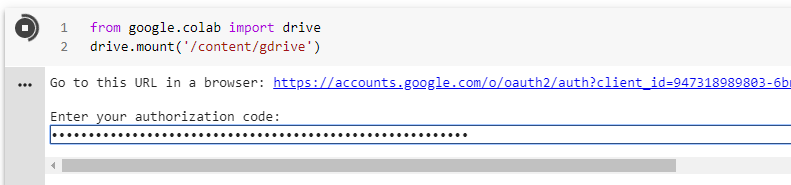

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

google drive連結後的路徑
content/gdrive/My Drive

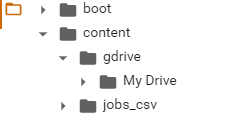

在google drive 建立一個 '人力銀行工作' 資料夾


In [0]:
!mkdir '/content/gdrive/My Drive/人力銀行工作'

In [0]:
glob.glob('jobs_csv/*.xlsx')

['jobs_csv/人力銀行工作資料_數據分析.xlsx']

In [0]:
!cp '/content/jobs_csv/人力銀行工作資料_數據分析.xlsx' '/content/gdrive/My Drive/人力銀行工作'  


# 使用google drive開啟xlsx檔案

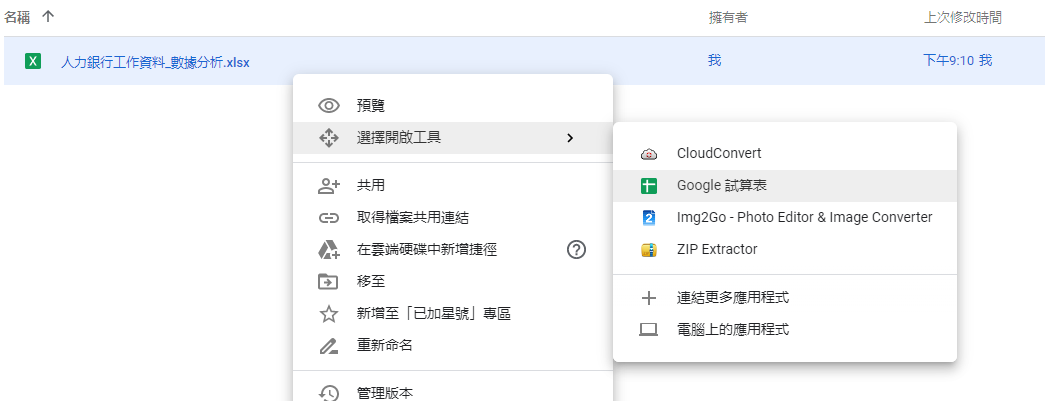

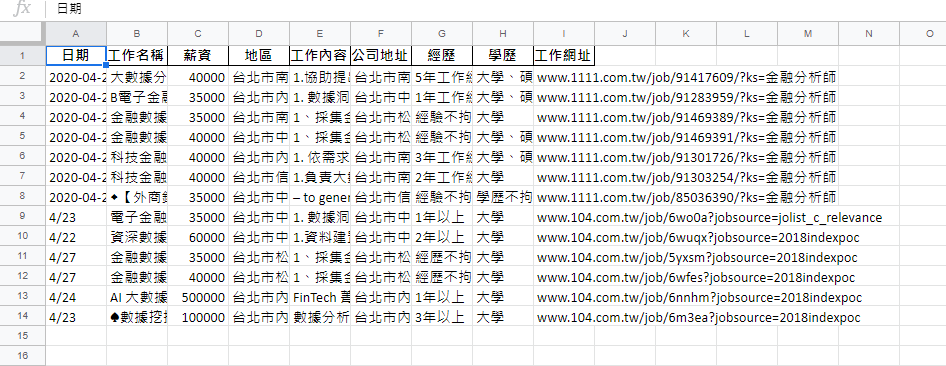